<a href="https://colab.research.google.com/github/lalsouza/airbnb_data_analysis/blob/main/airbnb_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> by [Lalnon Souza](https://github.com/lalsouza)
# Análise dos Dados do Airbnb - Boston

---

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. O detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Boston - Massachusetts, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Boston (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/united-states/ma/boston/2021-12-17/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizo [aqui](https://www.dropbox.com/s/iuvkkla3vttqfgq/listings.csv?dl=0) o conjunto que utilizamos, para que você sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [66]:
# importar o arquivo listings.csv para um DataFrame
#df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSNO3QmG0y94-yj52VSbbPD94VHu_vND0-Vimdh6n4ctUwoIMKXdUEaleGv8HTd5NQE_cg2LsfN9n9Y/pub?output=csv')
df = pd.read_csv('https://raw.githubusercontent.com/lalsouza/airbnb_data_analysis/main/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews que a propriedade possui (nos últimos 12 meses)
* `license` - a licença/autorização/número de registro 

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [67]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,125,32,21,2021-07-25,0.27,1,17,4,NaN
1,5506,** Private! Minutes to center!**,8229,Terry,NaN,Roxbury,42.32844,-71.09581,Entire home/apt,99,3,110,2021-10-25,0.71,10,75,3,Approved by the government
2,6695,Home Away from Home! Condo,8229,Terry,NaN,Roxbury,42.32802,-71.09387,Entire home/apt,250,3,116,2021-10-12,0.77,10,127,1,STR446650
3,8789,Curved Glass Studio/1bd facing Park,26988,Anne,NaN,Beacon Hill,42.35867,-71.06307,Entire home/apt,80,91,25,2020-04-15,0.28,6,244,0,NaN
4,10730,Bright 1bed facing Golden Dome,26988,Anne,NaN,Downtown,42.35906,-71.06271,Entire home/apt,95,91,32,2020-04-16,0.21,6,314,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [68]:
# identificar o volume de dados do DataFrame
print(f'Entradas: \t {df.shape[0]}')
print(f"Variáveis: \t {df.shape[1]}\n")

# verificar os tipos das variáveis
df.dtypes

Entradas: 	 3349
Variáveis: 	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [69]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False)

neighbourhood_group               100.000000
license                            44.789489
reviews_per_month                  29.829800
last_review                        29.829800
host_name                           9.704389
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* A coluna `licence` possui quase a metade de suas linhas nulas 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase um terço das linhas.
* A variável `host_name` têm aproximadamente 10% dos valores nulos.

### **Q3. Qual o tipo de distribuição das variáveis?** 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f078b41d7d0>,
      dtype=object)

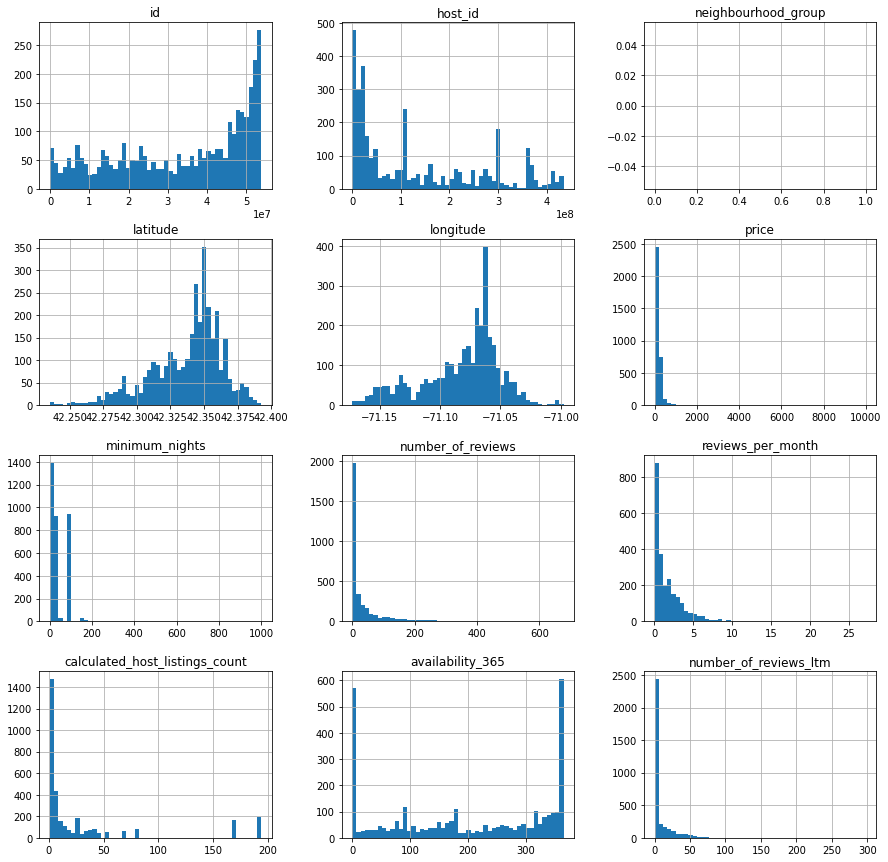

In [70]:
# plotar o histograma das variáveis numéricas
df.hist(figsize=(15,15), bins=50)

### **Q4. Qual a média dos preços de aluguel?**

In [71]:
# ver a média da coluna `price``
df.price.mean()

168.23111376530306

#### **Q4.1. Existem outliers que podem interferir no calculo da média?**

In [72]:
# verificar se há outliers em price
df.price.describe()

count     3349.000000
mean       168.231114
std        262.049196
min          0.000000
25%         75.000000
50%        126.000000
75%        200.000000
max      10000.000000
Name: price, dtype: float64

Olhando o resumo estatístico acima, podemos fazer algumas observações sobre a variável `price`:

* Possui 75% do valor abaixo de 200;
* Seu valor máximo é 10000;
* Sua média é de 168.231114.

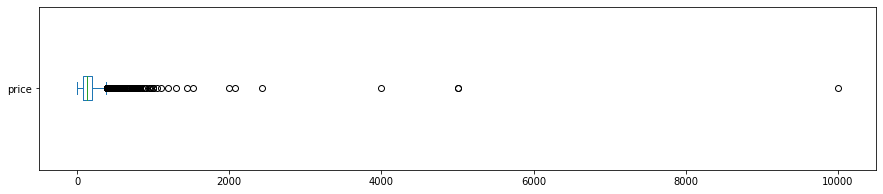

In [73]:
# verificar se há outliers em price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

Vemos que há uma grande concentração nos `price` abaixo de 2000 e a partir desse valor eles são poucos e bastante dispersos. Vamos então verificar se existem outliers ali

In [74]:
# ver quantidade de valores acima de 2000 para price
print("\nprice: valores acima de 2000")
print("{} entradas".format(len(df[df.price > 2000])))
print("{:.4f}%".format((len(df[df.price > 2000]) / df.shape[0])*100))


price: valores acima de 2000
6 entradas
0.1792%


Acima de 2000 são poucas as entradas (6 entradas) e estão muito distantes entre si. Veremos então quais são as essas entradas

In [75]:
# localizar a entradas com valores e price > 2000 e exibir somente colunas selecionadas
df.loc[df.price > 2000, ['id',
                         'name',
                         'neighbourhood',
                         'room_type',
                         'price',
                         'minimum_nights',
                         'number_of_reviews',
                         'last_review',
                         'calculated_host_listings_count',
                         'availability_365',
                         'number_of_reviews_ltm']]

,id,name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm
380,8116523,Brownstone in heart of Back Bay,Back Bay,Entire home/apt,5000,91,181,2018-05-19,5,0,0
576,13657486,"Large, modern 2br, 2ba renovated 6/16 with patio",Downtown,Entire home/apt,3999,180,4,2016-08-26,1,363,0
727,17138041,Downtown Destination | near Back Bay,Back Bay,Entire home/apt,5000,91,164,2019-11-27,1,0,0
1440,33352470,PRESIDENTIAL SUITE,Downtown,Hotel room,2429,1,0,NaN,13,218,0
1459,33638927,Gathering Retreat near downtown Fenway FreePrkg,Dorchester,Entire home/apt,2076,2,3,2021-07-25,17,356,1
1739,39772695,"Boston Homestel, Double Bed",Dorchester,Private room,10000,1,12,2020-08-02,1,138,0


A linha com o `id`: 1739, com o nome de ***Boston Homestel, Double Bed*** está muito fora da curva. Ela custa o dobro das locações mais caras e como descrito em `room_type` trata-se apenas de um quarto (Private room). Vamos então verificar os preços de outras locações na mesma localidade e fazer a comparação

In [76]:
# localizar a entradas localizadas em Dorchester e exibir somente colunas selecionadas
df.loc[df.neighbourhood == 'Dorchester'].price.describe()

count      449.000000
mean       146.120267
std        485.220213
min         23.000000
25%         48.000000
50%         87.000000
75%        159.000000
max      10000.000000
Name: price, dtype: float64

Podemos ver que mesmo dentro da mesma localidade, o valor dessa locação está muito acima da média: 146,120267 e se difere muito das outras, logo, podemos concluir que trata-se de um outlier.

Agora vamos retirar essa informação incorreta e recalcular a média dos valores na cidade

In [77]:
# primeiro fazemos uma cópia do DataFrame originale será nele onde faremos as alterações
df_clean = df.copy()

# remove-se do DataFrame o outlier
df_clean.drop(df_clean[df_clean.price >= 10000].index, axis=0, inplace=True)

# retira-se também 'neighbourhood_group' pois está 100% vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# calcula a média dos preços
df_clean.price.mean()

165.29450418160096

Apesar da retirada do outlier, isso não trouxe mudança significativa no valor da média.
Veremos então como ficou nosso histograma limpo


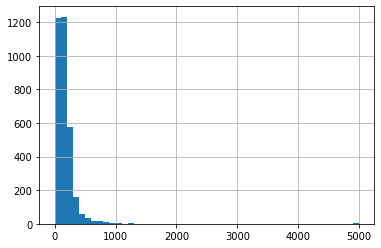

In [78]:
# exibir um gráfico do tipo hisograma
df_clean.price.hist(bins=50)

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [79]:
# criar uma matriz de correlação
corr = df_clean[['price',
                 'minimum_nights',
                 'number_of_reviews',
                 'reviews_per_month',
                 'calculated_host_listings_count',
                 'availability_365']].corr()


# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.035595,-0.018737,-0.008623,-0.050912,0.022243
minimum_nights,-0.035595,1.000000,-0.240366,-0.402627,0.159904,0.067978
number_of_reviews,-0.018737,-0.240366,1.000000,0.554746,-0.209325,-0.069806
reviews_per_month,-0.008623,-0.402627,0.554746,1.000000,-0.012761,0.036410
calculated_host_listings_count,-0.050912,0.159904,-0.209325,-0.012761,1.000000,0.329724
availability_365,0.022243,0.067978,-0.069806,0.036410,0.329724,1.000000


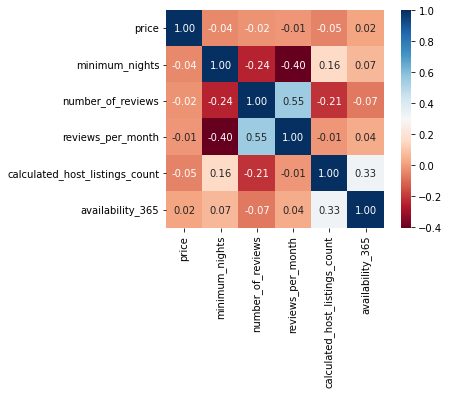

In [80]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [81]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    2102
Private room       1209
Hotel room           25
Shared room          12
Name: room_type, dtype: int64

In [82]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0]) * 100

Entire home/apt    62.783751
Private room       36.111111
Hotel room          0.746714
Shared room         0.358423
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [83]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Back Bay                   277.309179
South Boston Waterfront    240.000000
Chinatown                  238.804878
Charlestown                238.200000
Downtown                   218.346875
Fenway                     216.619403
South Boston               209.368056
West End                   196.127660
West Roxbury               193.129032
Leather District           184.333333
North End                  181.744681
South End                  179.473896
Beacon Hill                178.437500
Jamaica Plain              163.123853
Longwood Medical Area      147.000000
East Boston                143.779487
Bay Village                141.690476
Mission Hill               140.236364
Dorchester                 124.125000
Mattapan                   112.974359
Roxbury                    110.932384
Brighton                   109.120482
Allston                    101.420765
Roslindale                  97.852459
Hyde Park                   93.487179
Name: price, dtype: float64

In [84]:
# ver os preços por bairros, os mais caros
df_clean.groupby(['neighbourhood']).price.max().sort_values(ascending=False)

neighbourhood
Back Bay                   5000
Downtown                   3999
Dorchester                 2076
South Boston               1995
Jamaica Plain              1299
West Roxbury               1200
Roxbury                    1104
North End                  1052
Fenway                      959
Charlestown                 950
South End                   895
Brighton                    883
Beacon Hill                 799
Mission Hill                642
Chinatown                   637
West End                    605
South Boston Waterfront     597
Bay Village                 590
Allston                     500
East Boston                 416
Mattapan                    400
Hyde Park                   279
Longwood Medical Area       229
Leather District            214
Roslindale                  200
Name: price, dtype: int64

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

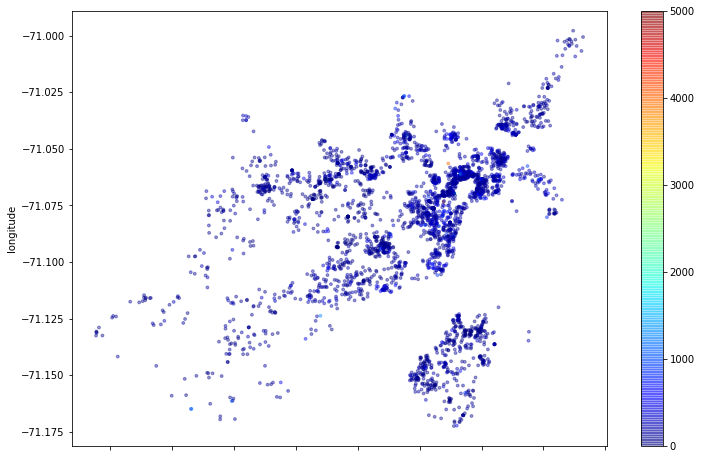

In [88]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter',
              x='latitude',
              y='longitude',
              alpha=0.4,
              c=df_clean['price'],
              s=8,
              cmap=plt.get_cmap('jet'),
              figsize=(12,8))

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [89]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

39.09617682198327

## Conclusões


Embora seja uma análise superficial, feita com base em um dataset resumido, é possível observar várias informações úteis que podem ser utilizadas para a tomada de decisões.

* embora um outilier estivesse presente no dataframe, esse não interferiu consideravelmente com as métricas de calculo
* qual a quantidade dos diferentes tipos de locação dos imoveis disponíveis, se são compartilhados, individuais, etc.
* quais são os bairros mais caros e onde estão os imoveis mais caros
* o grafico de latitude x longitude indica que os imoveis disponǘeis estão  geograficamente distribuidos
* a média minima de dias é de aproximadamente 39 dias o que indica que a preferêcia é por imóveis por temporada